<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Regressão
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Regressão;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever o peso do penguin (**body_mass_g**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [181]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.metrics import mean_squared_error


In [182]:
penguim = sns.load_dataset('penguins')


In [183]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **1.1. Analise exploratoria** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos por sexo:

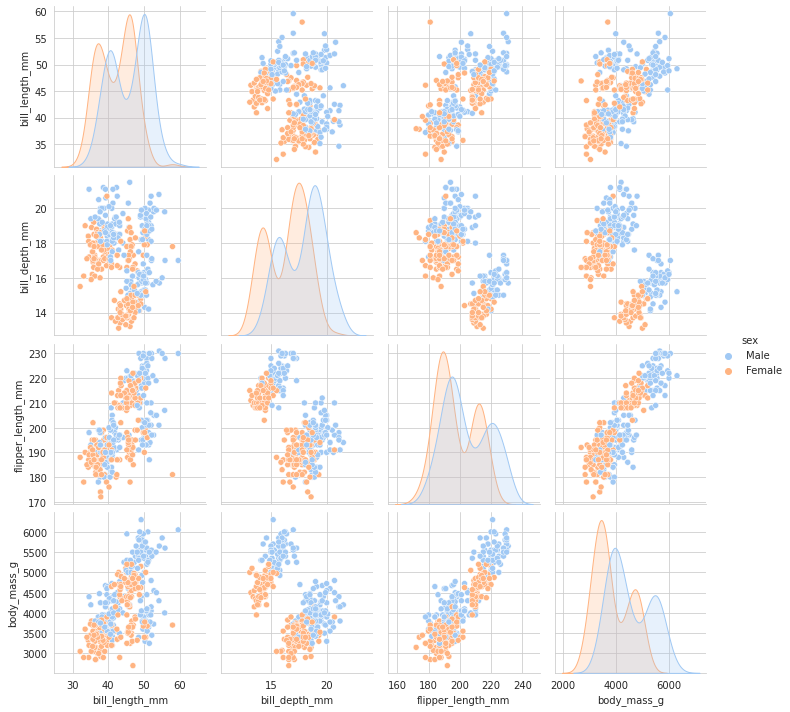

In [184]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="sex", palette="pastel")

**Comentário:** Apesar de haver uma certa superposição de características, há uma tendência de que os machos sejam maiores.

 - Atributos por espécie:

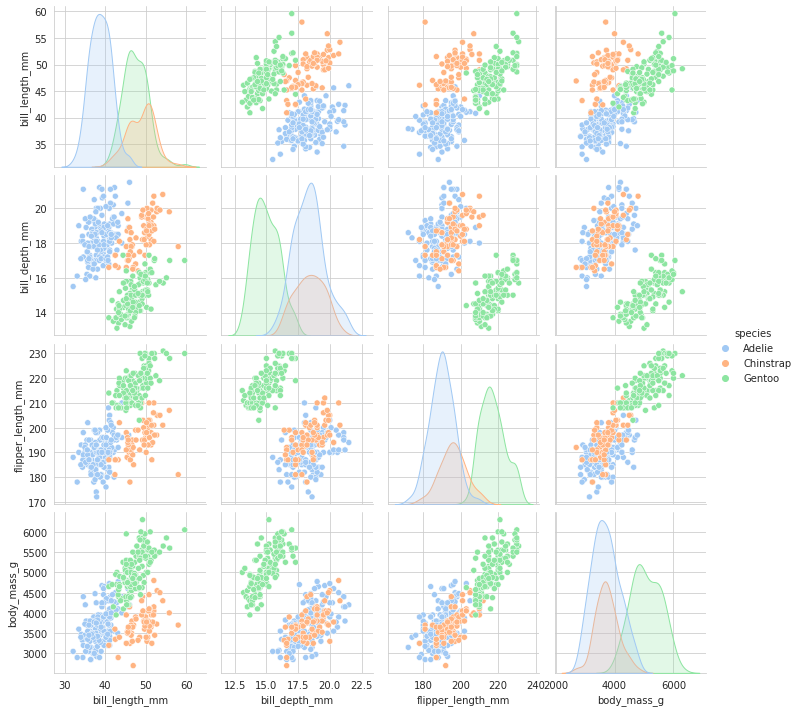

In [185]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="species", palette="pastel")

**Comentário:** a espécie Gentoo é a que possui a maior massa. As espécies Adelle e Cnhistrap são mais parecidas fisicamente.

 - Atributos por ilha:

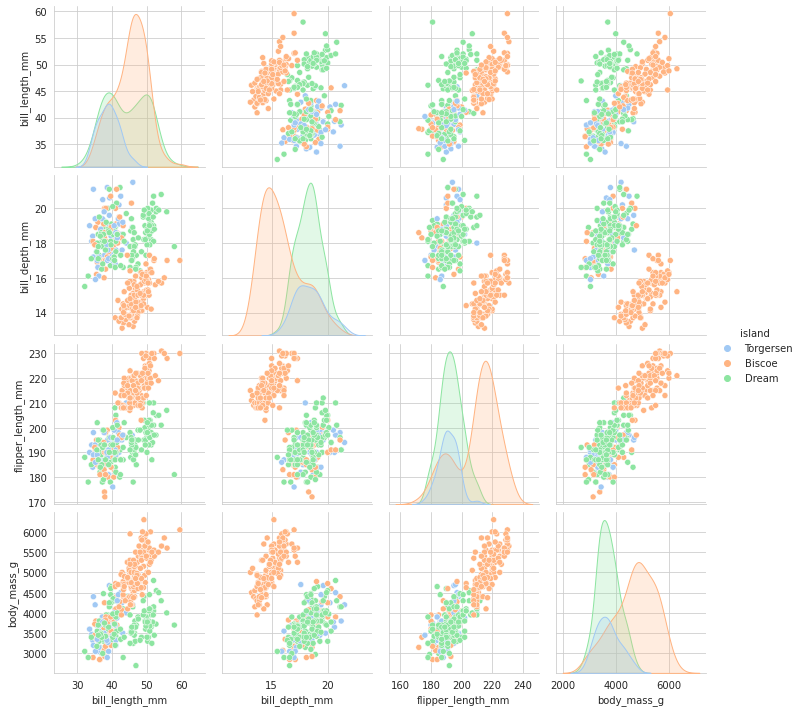

In [186]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="island", palette="pastel")

**Comentário:** Os pinguins da ilha Biscoe são maiores. Já os das ilhas Torgersen e Dream têm características muito semelhantes.

## 2\. Dados 

### **2.1. Valores nulos** 

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [187]:
penguim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [188]:
# resposta da questão 2.1
penguim.dropna(subset=['sex'], inplace=True)
penguim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [189]:
penguim_original = penguim.copy()
penguim_original.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### **2.2. Variáveis numéricas** 

Identifique as variáveis numéricas e crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [190]:
print(penguim.info())
variaveis_numericas = penguim.select_dtypes('float64').columns.drop('body_mass_g')
print(variaveis_numericas)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB
None
Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'], dtype='object')


In [191]:
# resposta da questão 2.2
for coluna in variaveis_numericas:
    media = penguim[coluna].mean()
    print(f'A media da {coluna} é {media}.')

    desvio_padrao = penguim[coluna].std()
    print(f'O desvio padrão da {coluna} é {desvio_padrao}.')

    penguim[f'{coluna}_std'] = penguim[coluna].apply(lambda item: (item-media) / desvio_padrao)

penguim.head()

A media da bill_length_mm é 43.99279279279279.
O desvio padrão da bill_length_mm é 5.468668342647559.
A media da bill_depth_mm é 17.164864864864864.
O desvio padrão da bill_depth_mm é 1.9692354633199007.
A media da flipper_length_mm é 200.96696696696696.
O desvio padrão da flipper_length_mm é 14.015765288287879.


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.894695,0.779559,-1.424608
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.821552,0.119404,-1.067867
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.675264,0.424091,-0.425733
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-1.333559,1.084246,-0.568429
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,-0.858123,1.744400,-0.782474


### **2.3. Variáveis categóricas** 

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

In [192]:
print(penguim.info())
variaveis_categoricas = penguim.select_dtypes('object').columns
print(variaveis_categoricas)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   species                333 non-null    object 
 1   island                 333 non-null    object 
 2   bill_length_mm         333 non-null    float64
 3   bill_depth_mm          333 non-null    float64
 4   flipper_length_mm      333 non-null    float64
 5   body_mass_g            333 non-null    float64
 6   sex                    333 non-null    object 
 7   bill_length_mm_std     333 non-null    float64
 8   bill_depth_mm_std      333 non-null    float64
 9   flipper_length_mm_std  333 non-null    float64
dtypes: float64(7), object(3)
memory usage: 28.6+ KB
None
Index(['species', 'island', 'sex'], dtype='object')


In [193]:
# resposta da questão 2.3

penguim['sex_m_nom'] = penguim['sex'].apply(lambda caractere: 1 if caractere =='Male' else 0)
penguim['sex_f_nom'] = penguim['sex'].apply(lambda caractere: 1 if caractere =='Female' else 0)
penguim['island_Torgersen_nom'] = penguim['island'].apply(lambda caractere: 1 if caractere =='Torgersen' else 0)
penguim['island_Biscoe_nom'] = penguim['island'].apply(lambda caractere: 1 if caractere =='Biscoe' else 0)
penguim['island_Dream_nom'] = penguim['island'].apply(lambda caractere: 1 if caractere =='Dream' else 0)
penguim['species_Adelie_nom'] = penguim['species'].apply(lambda caractere: 1 if caractere =='Adelie' else 0)
penguim['species_Chistrap_nom'] = penguim['species'].apply(lambda caractere: 1 if caractere =='Chinstrap' else 0)
penguim['species_Gentoo_nom'] = penguim['species'].apply(lambda caractere: 1 if caractere =='Gentoo' else 0)
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,sex_m_nom,sex_f_nom,island_Torgersen_nom,island_Biscoe_nom,island_Dream_nom,species_Adelie_nom,species_Chistrap_nom,species_Gentoo_nom
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.894695,0.779559,-1.424608,1,0,1,0,0,1,0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.821552,0.119404,-1.067867,0,1,1,0,0,1,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.675264,0.424091,-0.425733,0,1,1,0,0,1,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-1.333559,1.084246,-0.568429,0,1,1,0,0,1,0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,-0.858123,1.744400,-0.782474,1,0,1,0,0,1,0,0


### **2.4. Limpeza** 

Descarte as colunas originais e mantenha apenas a variável resposta e as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*". 

In [194]:
# resposta da questão 2.4
print(f'Depois das transformações, a base de dados ficou com {len(penguim.columns)} colunas.')
penguim.drop(columns=variaveis_numericas, inplace=True)
penguim.drop(columns=variaveis_categoricas, inplace=True)
print(f'Depois da descartar os dados desnecessários, a base de dados ficou com {len(penguim.columns)} colunas.')
penguim.columns

Depois das transformações, a base de dados ficou com 18 colunas.
Depois da descartar os dados desnecessários, a base de dados ficou com 12 colunas.


Index(['body_mass_g', 'bill_length_mm_std', 'bill_depth_mm_std',
       'flipper_length_mm_std', 'sex_m_nom', 'sex_f_nom',
       'island_Torgersen_nom', 'island_Biscoe_nom', 'island_Dream_nom',
       'species_Adelie_nom', 'species_Chistrap_nom', 'species_Gentoo_nom'],
      dtype='object')

### **2.5. Treino/Teste** 

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes. 

In [195]:
# resposta da questão 2.5
predictors_train, predictors_test, target_train, target_test = train_test_split(
    penguim.drop(['body_mass_g'], axis=1),
    penguim['body_mass_g'],
    test_size=.25,
    random_state=123
)

In [196]:
penguim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   body_mass_g            333 non-null    float64
 1   bill_length_mm_std     333 non-null    float64
 2   bill_depth_mm_std      333 non-null    float64
 3   flipper_length_mm_std  333 non-null    float64
 4   sex_m_nom              333 non-null    int64  
 5   sex_f_nom              333 non-null    int64  
 6   island_Torgersen_nom   333 non-null    int64  
 7   island_Biscoe_nom      333 non-null    int64  
 8   island_Dream_nom       333 non-null    int64  
 9   species_Adelie_nom     333 non-null    int64  
 10  species_Chistrap_nom   333 non-null    int64  
 11  species_Gentoo_nom     333 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 33.8 KB


In [197]:
penguim.shape

(333, 12)

In [198]:
predictors_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 59 to 331
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bill_length_mm_std     249 non-null    float64
 1   bill_depth_mm_std      249 non-null    float64
 2   flipper_length_mm_std  249 non-null    float64
 3   sex_m_nom              249 non-null    int64  
 4   sex_f_nom              249 non-null    int64  
 5   island_Torgersen_nom   249 non-null    int64  
 6   island_Biscoe_nom      249 non-null    int64  
 7   island_Dream_nom       249 non-null    int64  
 8   species_Adelie_nom     249 non-null    int64  
 9   species_Chistrap_nom   249 non-null    int64  
 10  species_Gentoo_nom     249 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 23.3 KB


In [199]:
predictors_train.shape

(249, 11)

In [200]:
predictors_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 111 to 80
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bill_length_mm_std     84 non-null     float64
 1   bill_depth_mm_std      84 non-null     float64
 2   flipper_length_mm_std  84 non-null     float64
 3   sex_m_nom              84 non-null     int64  
 4   sex_f_nom              84 non-null     int64  
 5   island_Torgersen_nom   84 non-null     int64  
 6   island_Biscoe_nom      84 non-null     int64  
 7   island_Dream_nom       84 non-null     int64  
 8   species_Adelie_nom     84 non-null     int64  
 9   species_Chistrap_nom   84 non-null     int64  
 10  species_Gentoo_nom     84 non-null     int64  
dtypes: float64(3), int64(8)
memory usage: 7.9 KB


In [201]:
predictors_test.shape

(84, 11)

In [202]:
target_train.shape

(249,)

In [203]:
target_test.shape

(84,)

## 3\. Modelagem 

### **3.1. Treino** 

Treine um modelo de **regressão linear** com os **dados de treino** (2/3).

In [204]:
# resposta da questão 3.1
model = model.fit(predictors_train, target_train)

In [205]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bill_length_mm_std', 'bill_depth_mm_std', 'flipper_length_mm_std',
        'sex_m_nom', 'sex_f_nom', 'island_Torgersen_nom',
        'island_Biscoe_nom', 'island_Dream_nom', 'species_Adelie_nom',
        'species_Chistrap_nom', 'species_Gentoo_nom'], dtype=object),
 'n_features_in_': 11,
 'coef_': array([ 128.95017535,  159.25487577,  248.88232459,  167.56297759,
        -167.56297759,  -67.62760481,   20.19006002,   47.43754479,
        -203.01893742, -542.74713653,  745.76607395]),
 '_residues': array([], dtype=float64),
 'rank_': 8,
 'singular_': array([2.53146876e+01, 1.62653260e+01, 1.16263240e+01, 6.26699417e+00,
        6.14514791e+00, 5.47018227e+00, 3.38493683e+00, 2.23187841e+00,
        2.08684060e-15, 1.81956125e-15, 4.07008292e-16]),
 'intercept_': 4110.766411860845}

In [206]:
a = model.coef_
b = model.intercept_
print(a)
print(b)

[ 128.95017535  159.25487577  248.88232459  167.56297759 -167.56297759
  -67.62760481   20.19006002   47.43754479 -203.01893742 -542.74713653
  745.76607395]
4110.766411860845


### **3.2. Avaliação** 

Calcule o **RMSE** para o modelo de **regressão linear** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui um RMSE de approx. 296g, 7% da média do peso, uma performance razoável (seu RMSE pode não ser igual).

In [207]:
target_predicted = model.predict(predictors_test)

In [208]:
target_predicted[0:5]

array([4209.95445185, 3173.46263573, 4795.74227939, 4731.82874526,
       4116.58534083])

In [209]:
target_predicted.shape

(84,)

In [210]:
target_test[0:5]

111    4600.0
158    3250.0
288    4700.0
308    4875.0
185    4100.0
Name: body_mass_g, dtype: float64

In [211]:
target_test.shape

(84,)

In [212]:
# resposta da questão 3.2
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

306.3733964340449


## 4\. Predição  

### **4.1. Novo penguim** 

Qual o peso de um penguim com as seguintes características:


| species	| island | bill_length_mm | bill_depth_mm | flipper_length_mm | sex |
| --- | --- | --- | --- | --- | --- |
| Adelie | Biscoe | 38.2 | 18.1 | 185.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2 e 2.3

> **Nota:** Como referência eu obtive um peso predito de 3786.16g (a sua predição pode não ser igual).

In [213]:
penguim.columns

Index(['body_mass_g', 'bill_length_mm_std', 'bill_depth_mm_std',
       'flipper_length_mm_std', 'sex_m_nom', 'sex_f_nom',
       'island_Torgersen_nom', 'island_Biscoe_nom', 'island_Dream_nom',
       'species_Adelie_nom', 'species_Chistrap_nom', 'species_Gentoo_nom'],
      dtype='object')

In [214]:
# resposta da questão 4.1
data = {
    'species': ['Adelie'],
    'island': ['Biscoe'],
    'bill_length_mm': [38.2],
    'bill_depth_mm': [18.1],
    'flipper_length_mm': [185.0], 
    'sex': ['Male']
}


novo_penguim = pd.DataFrame(data)
print(novo_penguim)

  species  island  bill_length_mm  bill_depth_mm  flipper_length_mm   sex
0  Adelie  Biscoe            38.2           18.1              185.0  Male


---

In [215]:
print(variaveis_numericas)

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'], dtype='object')


In [216]:

for coluna in variaveis_numericas:
    media = penguim_original[coluna].mean()
    print(f'A media da {coluna} é {media}.')

    desvio_padrao = penguim_original[coluna].std()
    print(f'O desvio padrão da {coluna} é {desvio_padrao}.')

    novo_penguim[f'{coluna}_std'] = novo_penguim[coluna].apply(lambda item: (item-media) / desvio_padrao)

novo_penguim.head()

A media da bill_length_mm é 43.99279279279279.
O desvio padrão da bill_length_mm é 5.468668342647559.
A media da bill_depth_mm é 17.164864864864864.
O desvio padrão da bill_depth_mm é 1.9692354633199007.
A media da flipper_length_mm é 200.96696696696696.
O desvio padrão da flipper_length_mm é 14.015765288287879.


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std
0,Adelie,Biscoe,38.2,18.1,185.0,Male,-1.059269,0.474872,-1.139215


In [217]:
novo_penguim['sex_m_nom'] = novo_penguim['sex'].apply(lambda caractere: 1 if caractere =='Male' else 0)
novo_penguim['sex_f_nom'] = novo_penguim['sex'].apply(lambda caractere: 1 if caractere =='Female' else 0)
novo_penguim['island_Torgersen_nom'] = novo_penguim['island'].apply(lambda caractere: 1 if caractere =='Torgersen' else 0)
novo_penguim['island_Biscoe_nom'] = novo_penguim['island'].apply(lambda caractere: 1 if caractere =='Biscoe' else 0)
novo_penguim['island_Dream_nom'] = novo_penguim['island'].apply(lambda caractere: 1 if caractere =='Dream' else 0)
novo_penguim['species_Adelie_nom'] = novo_penguim['species'].apply(lambda caractere: 1 if caractere =='Adelie' else 0)
novo_penguim['species_Chistrap_nom'] = novo_penguim['species'].apply(lambda caractere: 1 if caractere =='Chinstrap' else 0)
novo_penguim['species_Gentoo_nom'] = novo_penguim['species'].apply(lambda caractere: 1 if caractere =='Gentoo' else 0)
novo_penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,sex_m_nom,sex_f_nom,island_Torgersen_nom,island_Biscoe_nom,island_Dream_nom,species_Adelie_nom,species_Chistrap_nom,species_Gentoo_nom
0,Adelie,Biscoe,38.2,18.1,185.0,Male,-1.059269,0.474872,-1.139215,1,0,0,1,0,1,0,0


In [218]:
print(f'Depois das transformações, a base de dados ficou com {len(novo_penguim.columns)} colunas.')
novo_penguim.drop(columns=variaveis_numericas, inplace=True)
novo_penguim.drop(columns=variaveis_categoricas, inplace=True)
print(f'Depois da descartar os dados desnecessários, a base de dados ficou com {len(novo_penguim.columns)} colunas.')


Depois das transformações, a base de dados ficou com 17 colunas.
Depois da descartar os dados desnecessários, a base de dados ficou com 11 colunas.


In [219]:
print(novo_penguim.columns)

Index(['bill_length_mm_std', 'bill_depth_mm_std', 'flipper_length_mm_std',
       'sex_m_nom', 'sex_f_nom', 'island_Torgersen_nom', 'island_Biscoe_nom',
       'island_Dream_nom', 'species_Adelie_nom', 'species_Chistrap_nom',
       'species_Gentoo_nom'],
      dtype='object')


In [220]:
penguim.columns

Index(['body_mass_g', 'bill_length_mm_std', 'bill_depth_mm_std',
       'flipper_length_mm_std', 'sex_m_nom', 'sex_f_nom',
       'island_Torgersen_nom', 'island_Biscoe_nom', 'island_Dream_nom',
       'species_Adelie_nom', 'species_Chistrap_nom', 'species_Gentoo_nom'],
      dtype='object')

In [222]:
peso = model.predict(novo_penguim)
print(f'O peso calculado segundo o modelo para o novo penguim é de {peso}.')

O peso calculado segundo o modelo para o novo penguim é de [3751.0028301].
